### Download Flowers dataset

In [26]:
#You can download the data manually as well instead of using 'wget'
!wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

In [27]:
#Check if dataset has been downloaded
!ls -l

total 489376
-rw-rw-r--@ 1 vidyadharbendre  staff      32125 Mar 22 20:05 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff      75528 Mar 22 20:55 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff       6961 Mar 22 21:03 2a. Visualize an Image.ipynb
drwxr-xr-x@ 5 vidyadharbendre  staff        160 Mar 22 20:54 check_point_folder
-rw-r--r--@ 1 vidyadharbendre  staff  228813984 Feb 11  2016 flower_photos.tgz
-rw-r--r--@ 1 vidyadharbendre  staff   14479800 Mar 22 20:51 mnist_functional_template_v3.h5
drwxr-xr-x@ 6 vidyadharbendre  staff        192 Mar 22 20:54 save_mode_folder


In [28]:
#Extract images
!tar -xf flower_photos.tgz

In [29]:
!ls -l

total 489376
-rw-rw-r--@ 1 vidyadharbendre  staff      32125 Mar 22 20:05 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff      75528 Mar 22 20:55 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff       6961 Mar 22 21:03 2a. Visualize an Image.ipynb
drwxr-xr-x@ 5 vidyadharbendre  staff        160 Mar 22 20:54 check_point_folder
drwxr-x---@ 8 vidyadharbendre  staff        256 Feb 11  2016 flower_photos
-rw-r--r--@ 1 vidyadharbendre  staff  228813984 Feb 11  2016 flower_photos.tgz
-rw-r--r--@ 1 vidyadharbendre  staff   14479800 Mar 22 20:51 mnist_functional_template_v3.h5
drwxr-xr-x@ 6 vidyadharbendre  staff        192 Mar 22 20:54 save_mode_folder


In [30]:
!ls -l flower_photos

total 824
-rw-r-----@   1 vidyadharbendre  staff  418049 Feb  9  2016 LICENSE.txt
drwx------@ 635 vidyadharbendre  staff   20320 Feb 11  2016 daisy
drwx------@ 900 vidyadharbendre  staff   28800 Feb 11  2016 dandelion
drwx------@ 643 vidyadharbendre  staff   20576 Feb 11  2016 roses
drwx------@ 701 vidyadharbendre  staff   22432 Feb 11  2016 sunflowers
drwx------@ 801 vidyadharbendre  staff   25632 Feb 11  2016 tulips


In [31]:
!ls -l flower_photos/daisy

total 69592
-rw-r-----@ 1 vidyadharbendre  staff   26797 Jan 11  2016 100080576_f52e8ee070_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff  117247 Jan 11  2016 10140303196_b88d3d6cec.jpg
-rw-r-----@ 1 vidyadharbendre  staff   36410 Jan 11  2016 10172379554_b296050f82_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff  102862 Jan 11  2016 10172567486_2748826a8b.jpg
-rw-r-----@ 1 vidyadharbendre  staff   27419 Jan 11  2016 10172636503_21bededa75_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff  132803 Jan 11  2016 102841525_bd6628ae3c.jpg
-rw-r-----@ 1 vidyadharbendre  staff  102618 Jan 11  2016 1031799732_e7f4008c03.jpg
-rw-r-----@ 1 vidyadharbendre  staff   51688 Jan 11  2016 10391248763_1d16681106_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   13946 Jan 11  2016 10437754174_22ec990b77_m.jpg
-rw-r-----@ 1 vidyadharbendre  staff   13518 Jan 11  2016 10437770546_8bb6f7bdd3_m.jpg
-rw-r-----@ 1 vidyadharbendre  staff   84219 Jan 11  2016 10437929963_bc13eebe0c.jpg
-rw-r-----@ 1 vidyadharbendre  staff  172328 J

In [32]:
#Check out few file names for the photos - 

#for Linux uncomment the following line
!ls flower_photos/daisy | head -3

#For windows, uncomment the following line
#!dir data\flower_photos\daisy /a-d

100080576_f52e8ee070_n.jpg
10140303196_b88d3d6cec.jpg
10172379554_b296050f82_n.jpg


### Load image from the disk

In [33]:
import tensorflow as tf
import numpy as np

In [34]:
#Load an image using Keras image class
image_file = 'flower_photos/daisy/100080576_f52e8ee070_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)

In [35]:
type(flower_image)

PIL.JpegImagePlugin.JpegImageFile

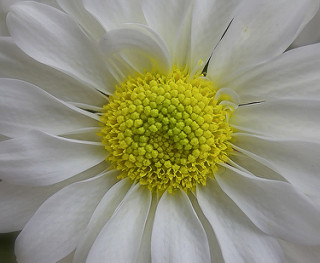

In [36]:
#Inspect image
flower_image

In [37]:
#Load another photograph
flower_image2 = tf.keras.preprocessing.image.load_img('flower_photos/daisy/10172379554_b296050f82_n.jpg')

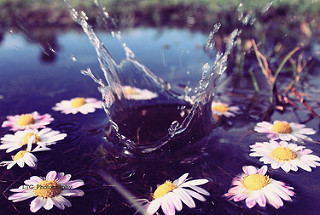

In [38]:
flower_image2

### Image Size

In [39]:
#Size of the image
flower_image.size

(320, 263)

In [40]:
#Size of 2nd image
flower_image2.size

(320, 215)

In [41]:
#Resizing image
flower_image3 = flower_image2.resize([200,200])

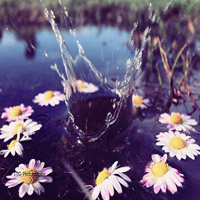

In [42]:
flower_image3

### Converting image to numpy array for ML

In [43]:
#1st image size - width, height
flower_image2.size

(320, 215)

In [44]:
#Convert an image to numpy array
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image2)
print('Shape of numpy array', flower_array.shape)

Shape of numpy array (215, 320, 3)


In [45]:
type(flower_array)

numpy.ndarray

In [46]:
#Check the contents of numpy array
flower_array[0,0,:]

array([138., 132., 120.], dtype=float32)

In [47]:
#Unique values in the numpy array - will be between 0-255
np.unique(flower_array)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

### Converting numpy array to image

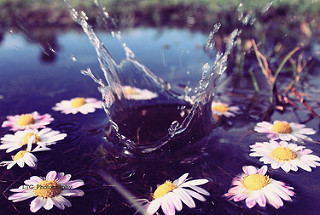

In [48]:
#Use array_to_img function to convert numpy array to image
new_image = tf.keras.preprocessing.image.array_to_img(flower_array)

#Show image
new_image

In [49]:
from matplotlib import pyplot as plt

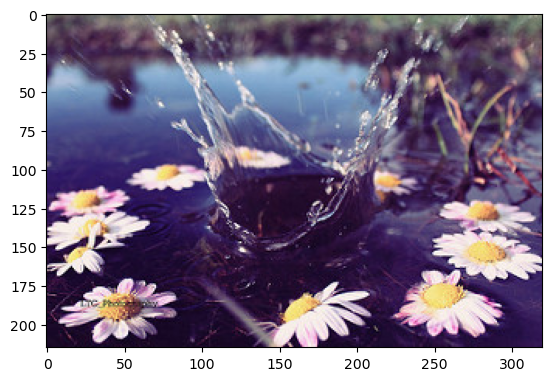

In [50]:
plt.imshow(flower_array.astype('uint8'))